# ECS6P9U/P/7026P: NEURAL NETWORKS & DEEP LEARNING (2022-23, Semester B)

#TASK 1 - Data Loaders

In [1]:
# Setting up google drive 
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
import sys
sys.path.append('/content/gdrive/MyDrive/Colab Notebooks')

Mounted at /content/gdrive


In [2]:
#importing necessary modules for the architecture
import my_utils as mu
import torch
from torch import nn
from torch.nn import functional as F

#importing the inbuilt CIFAR -10 dataset 
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split



dataset = CIFAR10(root='data/', download=True, transform=ToTensor())
test_dataset = CIFAR10(root='data/', train=False, transform=ToTensor())

classes = dataset.classes
classes

Files already downloaded and verified


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [3]:
#Reference for data loaders 
#https://medium.com/@sergioalves94/deep-learning-in-pytorch-with-cifar-10-dataset-858b504a6b54

In [4]:
#splitting the dataset into training and validation set
validation = 2000
train_size = len(dataset) - validation
train_ds, val_ds = random_split(dataset, [train_size, validation])
len(train_ds), len(val_ds)


(48000, 2000)

In [5]:
#using the DataLoader class to load the datasets into train and validation 
train_loader = DataLoader(train_ds, 128, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, 128, shuffle = True, num_workers=4, pin_memory=True)


/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [6]:
#creating the batch wise iteration 
train_iter2 = iter(train_loader)
x = next(train_iter2)

In [7]:
print(x[0].shape)

torch.Size([128, 3, 32, 32])


# TASK 2 - BUILDING THE MODEL 

In [8]:
class block1(nn.Module):
  def __init__(self,input_channels):
    super(block1,self).__init__()
    self.input_channels = input_channels
    #MLP layer to compute the coefficients within nn.Sequential
    self.mlp = nn.Sequential(
        nn.AvgPool2d(kernel_size=1, stride=1),
        nn.Flatten(),
        nn.Linear(input_channels*32*32, 128), #The spatial dimensions of image 32x32
        nn.ReLU(),
        nn.Linear(128,128),
        nn.Dropout(0.1),
        nn.Linear(128,10))
    self.relu = nn.ReLU(inplace = True)
    self.bn = nn.BatchNorm2d(128)

     # Conv Layers within the block 
    self.conv1 = nn.Sequential(
        nn.Conv2d(input_channels, out_channels=128, kernel_size=3, padding=1),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(2,2),
        nn.Dropout(0.1),
        nn.ReLU(inplace=True))
    
    self.conv2 = nn.Sequential(
        nn.Conv2d(input_channels, out_channels=128, kernel_size=3, padding=1),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(2,2),
        nn.Dropout(0.1),
        nn.ReLU(inplace=True))

    self.conv3 = nn.Sequential(
        nn.Conv2d(input_channels, out_channels=128, kernel_size=3, padding=1),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(2,2),
        nn.Dropout(0.1),
        nn.ReLU(inplace=True))    
    
    
    self.conv4 = nn.Sequential(
        nn.Conv2d(input_channels, out_channels=128, kernel_size=3, padding=1),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(2,2),
        nn.Dropout(0.1),
        nn.ReLU(inplace=True))
    
    self.conv5 = nn.Sequential(
        nn.Conv2d(input_channels, out_channels=128, kernel_size=3, padding=1),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(2,2),
        nn.Dropout(0.1),
        nn.ReLU(inplace=True))
    
    self.conv6 = nn.Sequential(
        nn.Conv2d(input_channels, out_channels=128, kernel_size=3, padding=1),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(2,2),
        nn.Dropout(0.1),
        nn.ReLU(inplace=True))
    
    self.conv7 = nn.Sequential(
        nn.Conv2d(input_channels, out_channels=128, kernel_size=3, padding=1),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(2,2),
        nn.Dropout(0.1),
        nn.ReLU(inplace=True))
    
    self.conv8 = nn.Sequential(
        nn.Conv2d(input_channels, out_channels=128, kernel_size=3, padding=1),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(2,2),
        nn.Dropout(0.1),
        nn.ReLU(inplace=True))
    
    self.conv9 = nn.Sequential(
        nn.Conv2d(input_channels, out_channels=128, kernel_size=3, padding=1),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(2,2),
        nn.Dropout(0.1),
        nn.ReLU(inplace=True))
    
    self.conv10 = nn.Sequential(
        nn.Conv2d(input_channels, out_channels=128, kernel_size=3, padding=1),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(2,2),
        nn.Dropout(0.1),
        nn.ReLU(inplace=True))

    
    
    
  def forward(self,x):
    linear_output = self.mlp(x)
    linear_output = linear_output.view(linear_output.size(0),-1)
    linear_output = self.relu(linear_output)

#COEFFICIENTS FOR THE LINEAR LAYER
    a1 = linear_output[:, 0]
    a1 = a1.reshape(-1, 1, 1, 1)


    a2 = linear_output[:, 1]
    a2 = a2.reshape(-1, 1, 1, 1)


    a3 = linear_output[:, 2]
    a3 = a3.reshape(-1, 1, 1, 1)
      
    a4 = linear_output[:, 3]
    a4 = a4.reshape(-1, 1, 1, 1)

    a5 = linear_output[:, 4]
    a5 = a4.reshape(-1, 1, 1, 1)

    a6 = linear_output[:, 5]
    a6 = a4.reshape(-1, 1, 1, 1)

    a7 = linear_output[:, 6]
    a7 = a4.reshape(-1, 1, 1, 1)


    a8 = linear_output[:, 7]
    a8 = a4.reshape(-1, 1, 1, 1)

    a9 = linear_output[:, 8]
    a9 = a4.reshape(-1, 1, 1, 1)


    a10 = linear_output[:, 9]
    a10= a4.reshape(-1, 1, 1, 1)

    a_list = [a1,a2,a3,a4,a5,a6,a7,a8,a9,a10]
#CONVOLUTION OUTPUTS 
    x1 = self.conv1(x)
    x2 = self.conv2(x)
    x3 = self.conv3(x)
    x4 = self.conv4(x)
    x5 = self.conv5(x)
    x6 = self.conv6(x)
    x7 = self.conv7(x)
    x8 = self.conv8(x)
    x9 = self.conv9(x)
    x10 = self.conv10(x)

    x_list = [x1,x2,x3,x4,x5,x6,x7,x8,x9,x10]

#multiply the convolution layer output to the corresponding coefficients
    ac_list = []
    for a, x in zip(a_list, x_list):
        ac = a * x
        ac_list.append(ac)
        

    #final output 
    total_product = torch.sum(torch.stack(ac_list), dim=0)
    total_product = self.bn(total_product)
    total_product = self.relu(total_product)

    return total_product



In [9]:
#initialising the weights
def init_weights(m):
  if type(m) == nn.Linear or type(m) == nn.Conv2d:
    torch.nn.init.xavier_uniform(m.weight)
  

## Backbone and classifier 

In [10]:

class backbone(nn.Module):
  def __init__(self,input_channels,num_classes):
    super(backbone,self).__init__()
    self.input_channels = input_channels
    self.num_classes = num_classes

    self.b1 = block1(3)

#classifier to classify num_classes = 10
    self.classifier = nn.Sequential(
            nn.AvgPool2d((1,1)),
            nn.Flatten(),
            nn.Linear(128*16*16,256),
            nn.Linear(256,512),
            nn.ReLU(),
            nn.Linear(512,num_classes))

  def forward(self,x):

    out = self.b1(x)
    out = self.classifier(out)
    
    return out

In [11]:
#initialising the model with the input channels for RGB and output classes
model = backbone(3,10)
model.apply(init_weights)
print(model)

backbone(
  (b1): block1(
    (mlp): Sequential(
      (0): AvgPool2d(kernel_size=1, stride=1, padding=0)
      (1): Flatten(start_dim=1, end_dim=-1)
      (2): Linear(in_features=3072, out_features=128, bias=True)
      (3): ReLU()
      (4): Linear(in_features=128, out_features=128, bias=True)
      (5): Dropout(p=0.1, inplace=False)
      (6): Linear(in_features=128, out_features=10, bias=True)
    )
    (relu): ReLU(inplace=True)
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv1): Sequential(
      (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Dropout(p=0.1, inplace=False)
      (4): ReLU(inplace=True)
    )
    (conv2): Sequential(
      (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): B

<ipython-input-9-2849adc70cf1>:4: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(m.weight)


In [12]:
#instantiating the cross entropy loss for classification tasks 
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, betas=(0.9, 0.999), weight_decay=0.0001, amsgrad=True)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)



# Task 4 - Training 

In [13]:
#defining a training function for the model 
def trainf(net, train_iter, test_iter, loss, num_epochs, optimizer, device):
    """Train and evaluate a model with CPU or GPU."""
    net.to(device)
    animator = mu.d2l.Animator(xlabel='epoch', xlim=[0, num_epochs],
                            legend=['train loss', 'train acc', 'test acc'])
    timer = mu.d2l.Timer()
    for epoch in range(num_epochs):
        metric = mu.d2l.Accumulator(3)  # train_loss, train_acc, num_examples
        for i, (X, y) in enumerate(train_iter):
            timer.start()
            net.train()
            optimizer.zero_grad()
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            with torch.no_grad():
                metric.add(l*X.shape[0], mu.d2l.accuracy(y_hat, y), X.shape[0])
            timer.stop()
            train_loss, train_acc = metric[0]/metric[2], metric[1]/metric[2]
            if (i+1) % 50 == 0:
                animator.add(epoch + i/len(train_iter),
                              (train_loss, train_acc, None))
        test_acc = mu.evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch+1, (None, None, test_acc))
    print(f'loss {train_loss:.3f}, train acc {train_acc:.3f}, '
          f'test acc {test_acc:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec '
          f'on {str(device)}')

loss 0.244, train acc 0.929, test acc 0.692
1169.1 examples/sec on cuda


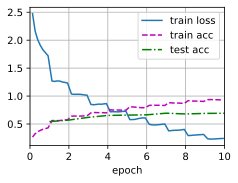

In [14]:
#Train the function alongside testing the accuracy for validation dataset
num_epochs = 10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') #choose device: cpu or gpu
print('Using device:', device)
if torch.cuda.is_available():
   print(torch.cuda.get_device_name(0))
trainf(model, train_loader, val_loader, loss, num_epochs, optimizer,device)

In [15]:
#Load the test dataset of length 10000 using data loader
test_data = DataLoader(test_dataset, 128, shuffle = True, num_workers=4, pin_memory=True)


In [16]:
#number of batches being split into
len(test_data)

79

loss 0.025, train acc 0.999, test acc 0.697
1174.2 examples/sec on cuda


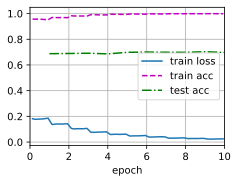

In [17]:
# Test accuracy 
num_epochs = 10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') #choose device: cpu or gpu
print('Using device:', device)
if torch.cuda.is_available():
   print(torch.cuda.get_device_name(0))
trainf(model, train_loader, test_data, loss, num_epochs, optimizer,device)